# Intensität in Bildebene

Quelle: https://www2.ph.ed.ac.uk/~wjh/teaching/mo/slides/lens/lens.pdf

In [5]:
import numpy as np
from matplotlib import pyplot as pp
from scipy.special import j1, sinc
from ipywidgets import interact, FloatSlider
import matplotlib.cm as cm

## Analytische Lösung

In [6]:
x = np.linspace(-15,15,2**10)
y = j1(x) / x

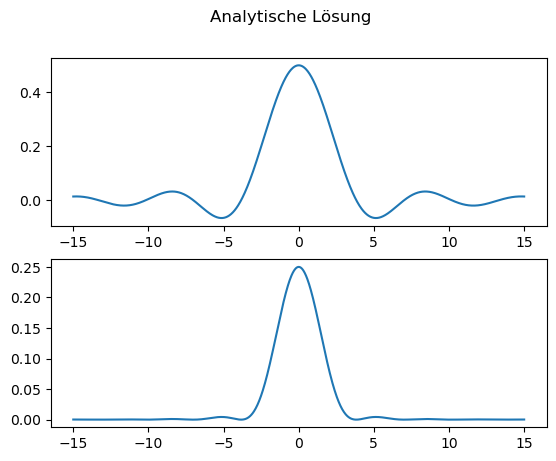

In [7]:
fig, axs = pp.subplots(2)
fig.suptitle('Analytische Lösung')
axs[0].plot(x, y)
axs[1].plot(x, y**2)
pp.show()

## Numerische Lösung

In [8]:
# Radius der Linse in xy-Ebene
r = 4

# Begrenzung der x und y Range
h = 5 


# Wellenlänge Licht 700nm (rot)
lmbda = 700 * 10**-9 

# Genauigkeit
N = 2**5

### Linsenparameter

In [9]:
# Brennweite der Linse
f = 10 

# Brechungsindex der Linse 
n = 4/3 

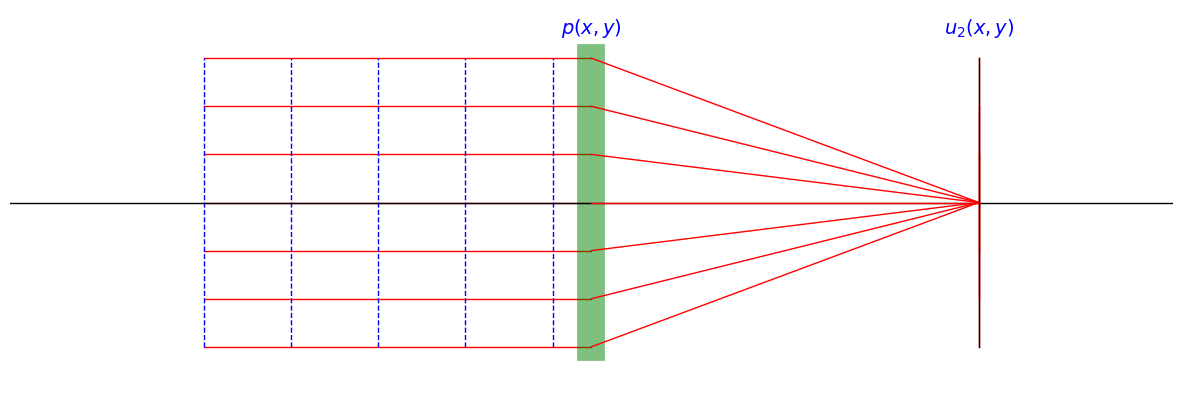

In [10]:
# Create a figure and axis
fig, ax = pp.subplots(figsize=(15, 5))


# Draw the wavefronts before the lens
for i in np.linspace(-3, 3, 7):
    ax.plot([-f, 0], [i, i], 'r', lw=1)

# Draw the lens
lens_x = [0, 0]
lens_y = [-3, 3]
ax.plot(lens_x, lens_y, 'g', linewidth=20, alpha=0.5)

# Draw vertical rays before the lens
for j in np.linspace(-10, -1, 5):
    ax.plot([j, j], [-3, 3], 'b--', lw=1)

# Draw the optical axis
ax.plot([-f-10, f + 10], [0, 0], 'k', lw=1)

# Draw the rays through the lens and stopping at the screen
for i in np.linspace(-3, 3, 7):
    ax.plot([0, f], [i, 0], 'r', lw=1)
    ax.plot([f, f], [0, i], 'r', lw=1)

# Draw the screen
ax.plot([f, f], [-3, 3], 'k', lw=1)

# Set axis limits
ax.set_xlim([-f - 5, f + 5])
ax.set_ylim([-4, 4])

# Hide the axes
ax.axis('off')

# Show the plot
pp.show()


In [10]:
k = 2 * np.pi / lmbda
k

8975979.010256551

In [11]:
x_range = np.linspace(-h,h,N)
y_range = np.linspace(-h,h,N)


x, y = np.meshgrid(x_range, y_range)

### Filterfunktion 
Bereich für Integral

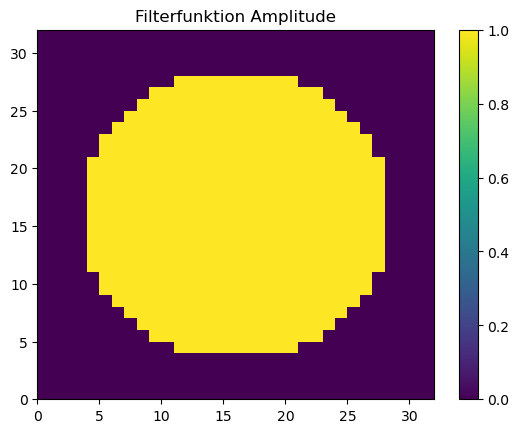

In [12]:
p_filter = np.where(x**2 + y**2 <= r**2,1,0)

pp.pcolormesh(p_filter)
pp.title('Filterfunktion Amplitude')
pp.colorbar()

In [13]:
s = x
t = y 

In [14]:
ds = (x_range[-1] - x_range[0]) / N 
dt = (y_range[-1] - y_range[0]) / N 

ds_dt = np.ones(x.shape) * ds * dt

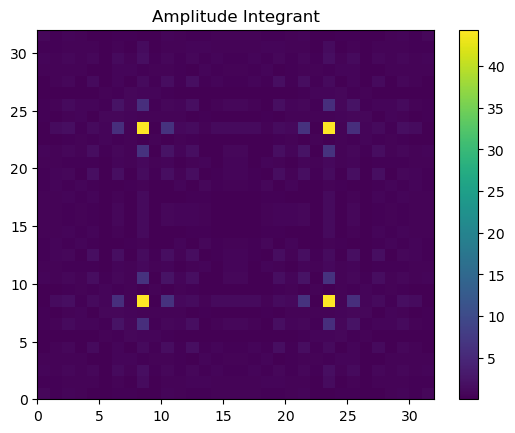

In [15]:
u2 = np.ones((N,N), dtype=complex)

for i in range (N):
    for j in range(N): 
        integrand = np.exp(-1j * k / f * ( x[i,j] * s + y[i,j] * t))
        u2[i,j] = np.sum(p_filter * integrand * ds_dt)

pp.pcolormesh(np.abs(u2))
pp.title('Amplitude Integrant')
pp.colorbar()


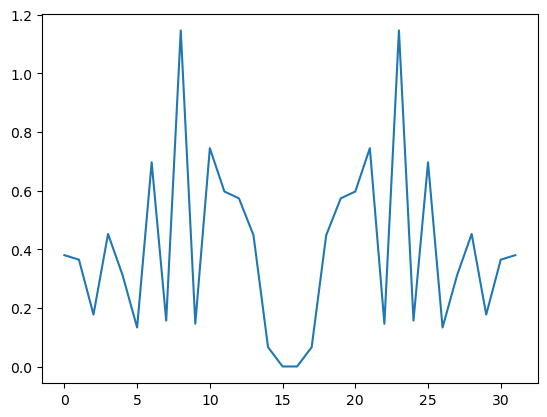

In [16]:
pp.plot(np.abs(u2)[N//2,])

In [14]:
z0 = 5  
z1 = 5

# Konstante Amplitude A0
A0 = 1 

# Konstante nDelta
nDelta = 1


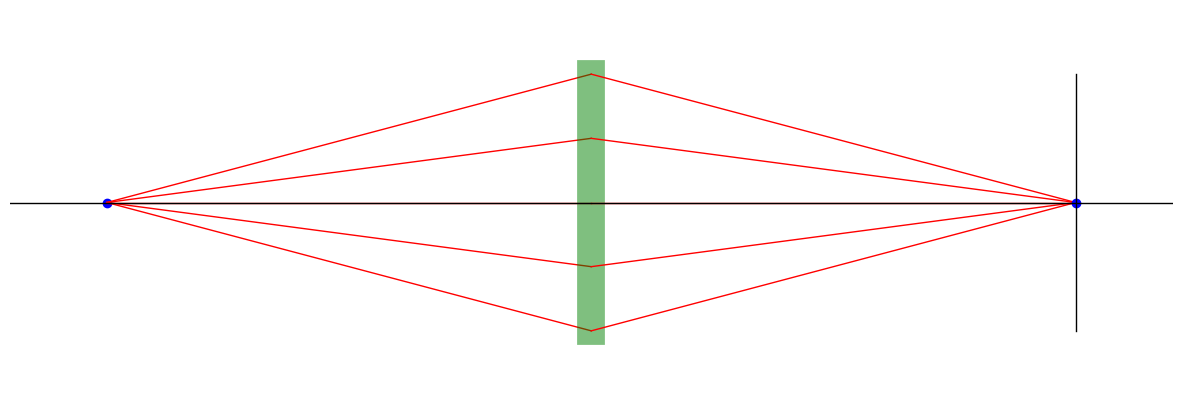

In [16]:
# Create a figure and axis
fig, ax = pp.subplots(figsize=(15, 5))

# Draw the point source at P0
ax.plot([-z0], [0], 'bo')  # Point source at P0

# Draw the rays originating from P0
for i in np.linspace(-2, 2, 5):
    ax.plot([-z0, 0], [0, i], 'r', lw=1)

# Draw the lens
lens_x = [0, 0]
lens_y = [-2, 2]
ax.plot(lens_x, lens_y, 'g', linewidth=20, alpha=0.5)


# Draw the rays converging to the point on the screen
for i in np.linspace(-2, 2, 5):
    ax.plot([0, z1], [i, 0], 'r', lw=1)

# Draw the screen at P2
ax.plot([z1], [0], 'bo')  # Point on the screen


# Draw the image plane at P2
ax.plot([z1, z1], [-2, 2], 'k', lw=1)

# Draw the optical axis
ax.plot([-z0-1, z1 + 1], [0, 0], 'k', lw=1)

# Add text labels


# Set axis limits
ax.set_xlim([-z0 - 1, z1 + 1])
ax.set_ylim([-3, 3])

# Hide the axes
ax.axis('off')

# Show the plot
plt.show()


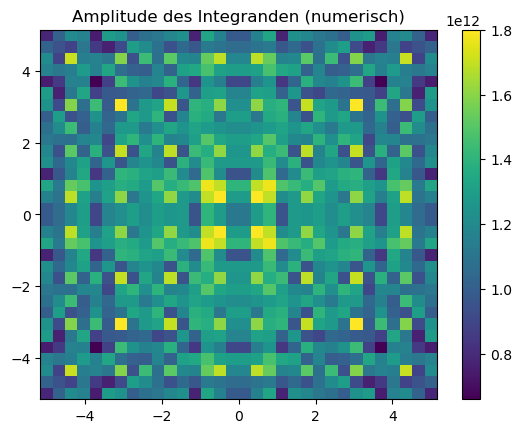

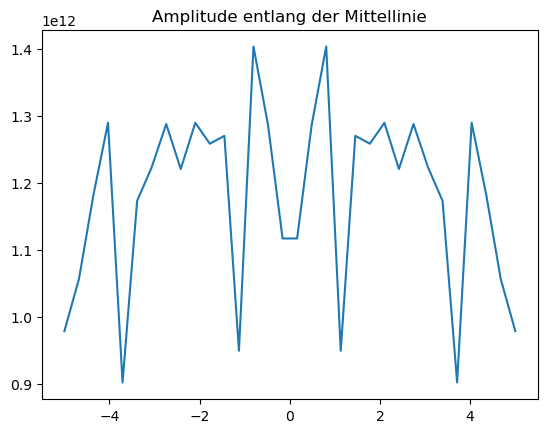

In [18]:
u2 = np.zeros((N, N), dtype=complex)

for i in range(N):
    for j in range(N):
        integrand = p_filter * np.exp(1j * 2 * (s**2 + t**2) * (1/z0 + 1/z1 - 1/f)) * np.exp(-1j * k * (x[i, j] * s + y[i, j] * t)/z1)
        u2[i, j] = A0 / (lmbda**2 * z0 * z1) * np.exp(1j * k * (z0 + z1 + nDelta)) * np.exp(1j * k * (x[i, j]**2 + y[i, j]**2) / (2 * z1)) * np.sum(integrand * ds_dt)

# Plotte die Amplitude des Integranden
pp.figure()
pp.pcolormesh(x, y, np.abs(u2))
pp.title('Amplitude des Integranden (numerisch)')
pp.colorbar()
pp.show()
# Plotte die Amplitude entlang der Mittellinie
pp.figure()
pp.plot(x_range, np.abs(u2[N//2, :]))
pp.title('Amplitude entlang der Mittellinie')
pp.show()

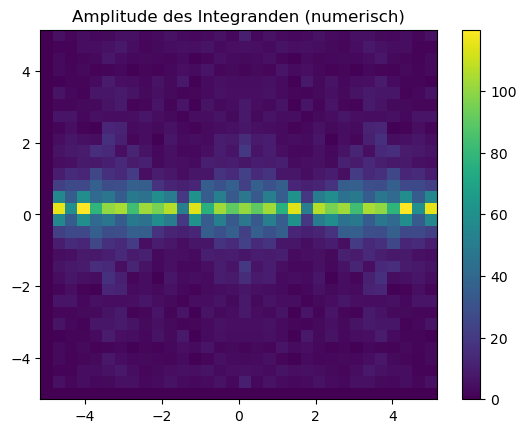

In [25]:
def phase_function(lmbda, f, k):
    return -k * x**2+y**2 / f

Phi = phase_function(lmbda, f, k)

# Gesamteffekt der Linse
lens_effect = p_filter * np.exp(1j * Phi)

# Fourier-Transformation zur Berechnung der Amplitude u2(x,y)
def calculate_amplitude(lens_effect):
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(lens_effect)))

U2 = calculate_amplitude(lens_effect)

# Normierung der Amplitude für die Darstellung (nicht skaliert)
amplitude_U2 = np.abs(U2)

pp.figure()
pp.pcolormesh(x, y, amplitude_U2)
pp.title('Amplitude des Integranden (numerisch)')
pp.colorbar()
pp.show()

Text(0, 0.5, 'y')

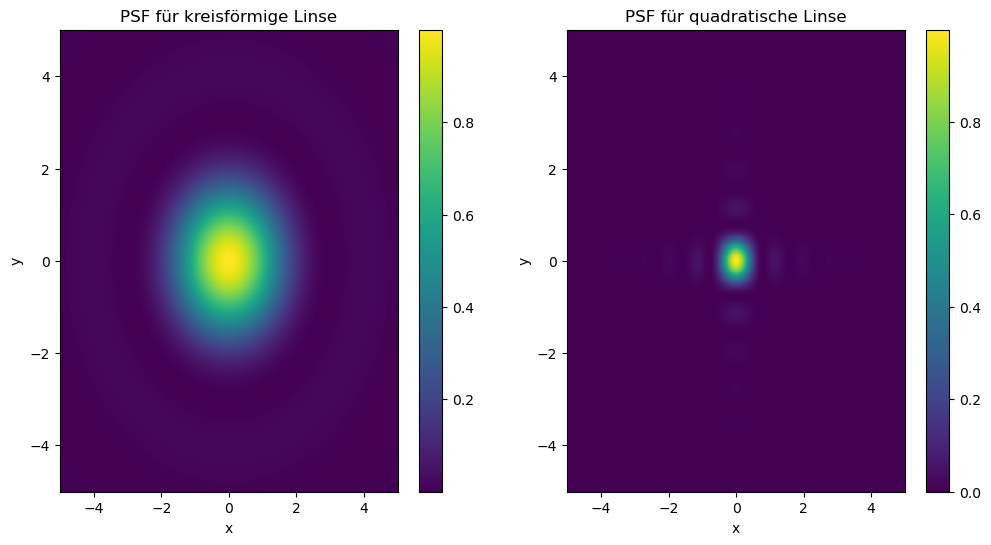

In [33]:
# Funktion für die kreisförmige PSF
def circular_psf(rho, lmbda, f, a):
    jinc = 2 * j1(k * a * rho / f) / (k * a * rho / f)
    return jinc**2

# Funktion für die quadratische PSF
def square_psf(x, y, lmbda, f, a):
    sinc_x = sinc(k * a * x / f)
    sinc_y = sinc(k * a * y / f)
    return sinc_x**2 * sinc_y**2


# Radiale Koordinaten für die kreisförmige PSF
rho = np.sqrt(x**2 + y**2)


# Berechnung der PSF für die kreisförmige Linse
psf_circular = circular_psf(rho, lmbda, f, a)

# Berechnung der PSF für die quadratische Linse
psf_square = square_psf(x, y, lmbda, f, a)

# Plot der PSF für kreisförmige Linse
pp.figure(figsize=(12, 6))
pp.subplot(1, 2, 1)
pp.pcolormesh(x, y, psf_circular, shading='auto')
pp.title('PSF für kreisförmige Linse')
pp.colorbar()
pp.xlabel('x')
pp.ylabel('y')

# Plot der PSF für quadratische Linse
pp.subplot(1, 2, 2)
pp.pcolormesh(x, y, psf_square, shading='auto')
pp.title('PSF für quadratische Linse')
pp.colorbar()
pp.xlabel('x')
pp.ylabel('y')

